### Análises e gráficos 

✅ Dataset carregado com sucesso!
Dimensão: (1228, 13)
   Unnamed: 0         Cod_ID                        NOME_UDH  \
0           0  1310500000001                          Baldim   
1           1  1310620001001                Lindéia / Jatobá   
2           2  1310620001002  Solar do Barreiro : Corumbiara   

              NOME_MUN   IDHM  IDHM_E  IDHM_R  IDHM_L  E_ANOSESTUDO  \
0          Baldim (MG)  0.592   0.459   0.591   0.766          9.69   
1  Belo Horizonte (MG)  0.664   0.565   0.654   0.791         10.48   
2  Belo Horizonte (MG)  0.582   0.430   0.609   0.751          9.27   

   I_ESCOLARIDADE  I_FREQ_PROP  GINI    RDPC  
0           0.277        0.591  0.52  316.74  
1           0.430        0.648  0.40  468.62  
2           0.332        0.490  0.44  352.96  


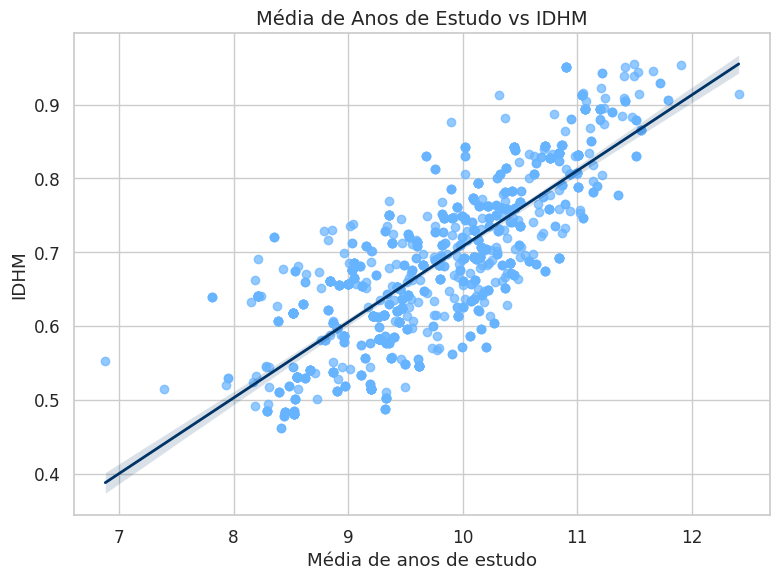

📈 Correlação entre Anos de Estudo e IDHM: 0.80


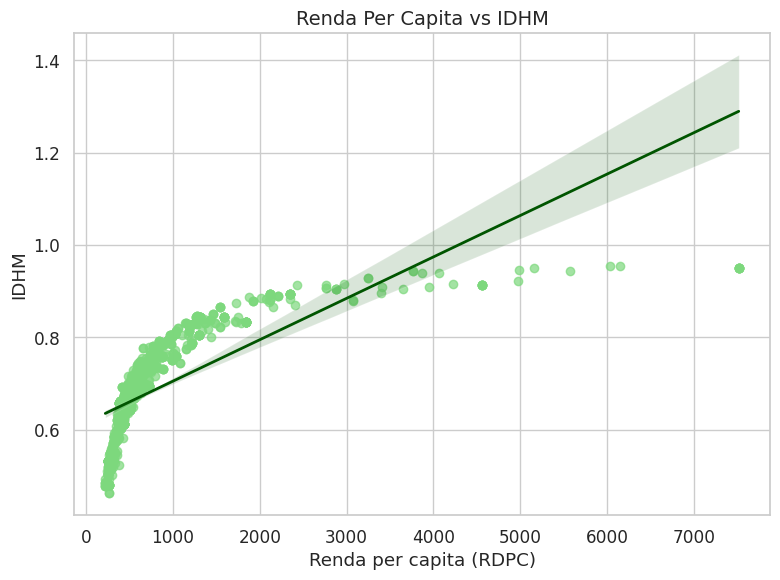

📈 Correlação entre Renda per Capita e IDHM: 0.72


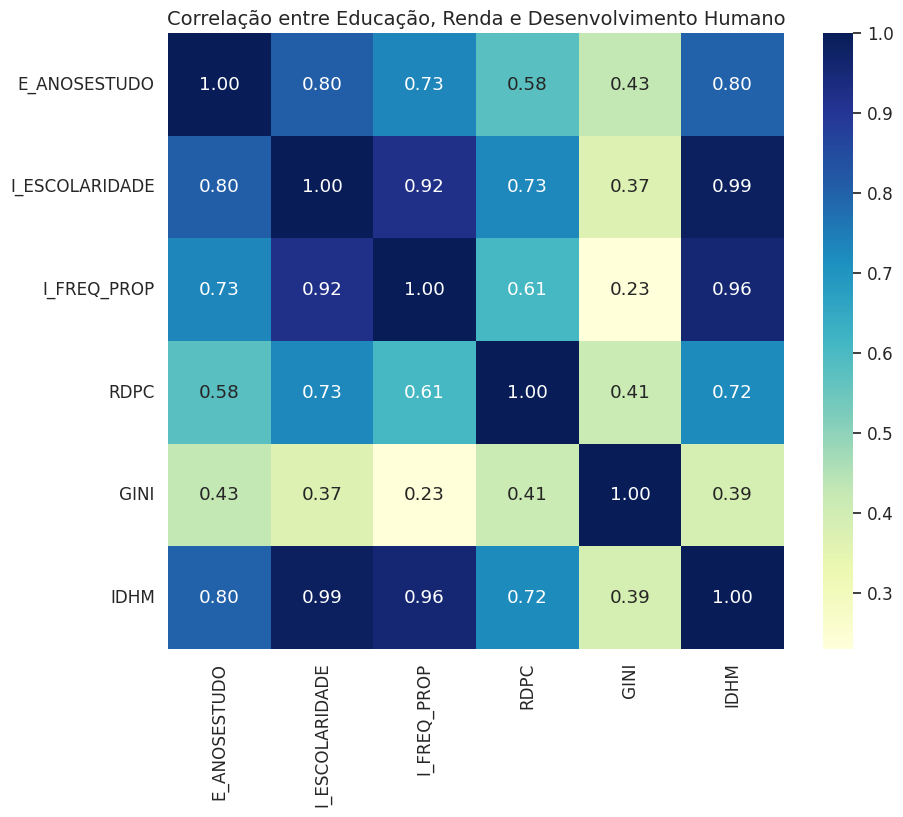

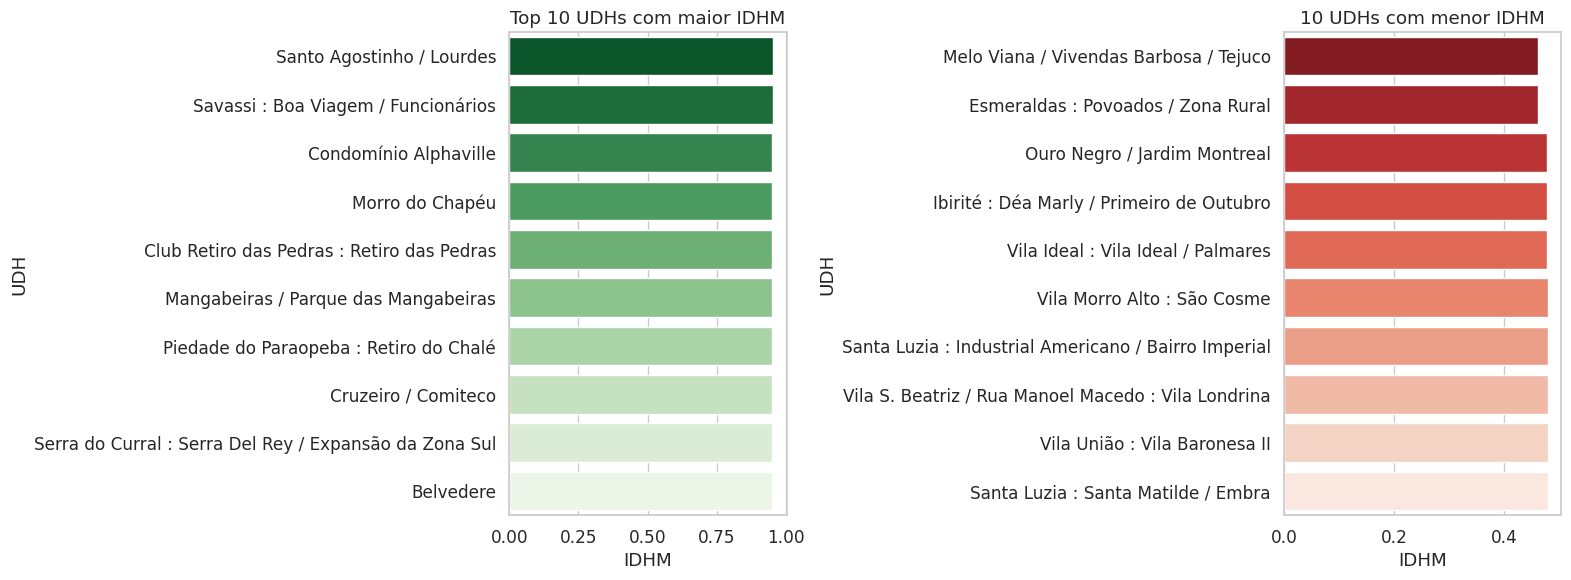

In [ ]:
# ============================================================
# 📊 ANÁLISE EXPLORATÓRIA - EDUCAÇÃO, RENDA E DESENVOLVIMENTO HUMANO
# ============================================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais de estilo do Seaborn
sns.set(style="whitegrid", palette="crest", font_scale=1.1)


plt.rcParams["font.family"] = "DejaVu Sans"

# Caminho do arquivo CSV refinado contendo os dados das UDHs
path = "/home/alencaravelar/Desktop/zetta-lab/zetta-lab/data/refined/base_udh_refined.csv"

# Carregar dataset em um DataFrame do pandas
df = pd.read_csv(path)

# Exibir informações básicas do dataset
print("✅ Dataset carregado com sucesso!")
print("Dimensão:", df.shape)  # linhas x colunas
print(df.head(3))             # primeiras 3 linhas para inspeção

# ============================================================
# 1️⃣ EDUCAÇÃO x IDHM (com tendência linear)
# ============================================================

# Criar gráfico de dispersão com linha de regressão entre anos de estudo e IDHM
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="E_ANOSESTUDO", y="IDHM",
    scatter_kws={"alpha":0.7, "color":"#66b3ff"},  # transparência e cor dos pontos
    line_kws={"color":"#003366", "lw":2}           # cor e largura da linha de tendência
)
plt.title("Média de Anos de Estudo vs IDHM", fontsize=14)
plt.xlabel("Média de anos de estudo")
plt.ylabel("IDHM")
plt.tight_layout()
plt.show()

# Calcular correlação entre anos de estudo e IDHM
corr_edu = df["E_ANOSESTUDO"].corr(df["IDHM"])
print(f"📈 Correlação entre Anos de Estudo e IDHM: {corr_edu:.2f}")

# ============================================================
# 2️⃣ RENDA PER CAPITA x IDHM (com tendência linear)
# ============================================================

# Criar gráfico de dispersão com linha de regressão entre renda per capita e IDHM
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="RDPC", y="IDHM",
    scatter_kws={"alpha":0.7, "color":"#7dd87d"},  # cor e transparência dos pontos
    line_kws={"color":"#005500", "lw":2}           # cor e largura da linha de tendência
)
plt.title("Renda Per Capita vs IDHM", fontsize=14)
plt.xlabel("Renda per capita (RDPC)")
plt.ylabel("IDHM")
plt.tight_layout()
plt.show()

# Calcular correlação entre renda per capita e IDHM
corr_renda = df["RDPC"].corr(df["IDHM"])
print(f"📈 Correlação entre Renda per Capita e IDHM: {corr_renda:.2f}")

# ============================================================
# 4️⃣ HEATMAP DE CORRELAÇÃO ENTRE EDUCAÇÃO, RENDA E IDHM
# ============================================================

# Selecionar variáveis de interesse
corr_vars = ["E_ANOSESTUDO", "I_ESCOLARIDADE", "I_FREQ_PROP", "RDPC", "GINI", "IDHM"]

# Criar heatmap com a correlação entre as variáveis
plt.figure(figsize=(10,8))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap="YlGnBu", fmt=".2f", square=True)
plt.title("Correlação entre Educação, Renda e Desenvolvimento Humano", fontsize=14)
plt.show()

# ============================================================
# 5️⃣ RANKING DAS UDHs (maior e menor IDHM)
# ============================================================

# Selecionar top 10 UDHs com maior IDHM
top = df.sort_values("IDHM", ascending=False).head(10)
# Selecionar 10 UDHs com menor IDHM
bottom = df.sort_values("IDHM", ascending=True).head(10)

# Criar figura com dois subplots lado a lado
fig, ax = plt.subplots(1, 2, figsize=(16,6))

# Gráfico de barras das UDHs com maior IDHM
sns.barplot(
    data=top,
    y="NOME_UDH",
    x="IDHM",
    hue="NOME_UDH",         
    palette="Greens_r",  # tons de verde invertidos
    ax=ax[0],
    legend=False
)
ax[0].set_title("Top 10 UDHs com maior IDHM")
ax[0].set_xlabel("IDHM")
ax[0].set_ylabel("UDH")

# Gráfico de barras das UDHs com menor IDHM
sns.barplot(
    data=bottom,
    y="NOME_UDH",
    x="IDHM",
    hue="NOME_UDH",         
    palette="Reds_r",  # tons de vermelho invertidos
    ax=ax[1],
    legend=False
)
ax[1].set_title("10 UDHs com menor IDHM")
ax[1].set_xlabel("IDHM")
ax[1].set_ylabel("UDH")

plt.tight_layout()
plt.show()
